In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from itertools import combinations
import numpy as np

# Load the dataset
df = pd.read_csv('/content/prog_book.csv')

# Define numerical features
numerical_features = ['Rating', 'Reviews', 'Number_Of_Pages', 'Price']

# because Reviews is of type object, it cannot be used to directly calculate IQR
# therefore we need to convert it to float64
# because some values of reviews contain ",", we need to remove it and convert it
df['Reviews'] = df['Reviews'].str.replace(',', '').astype(float)
# print(df.dtypes)


0                  Hardcover
1                  Hardcover
2             Kindle Edition
3                  Hardcover
4             Kindle Edition
               ...          
266                Hardcover
267                Paperback
268    Boxed Set - Hardcover
269                Hardcover
270                Hardcover
Name: Type, Length: 271, dtype: object


# Task 1: Univariate Outlier detection (4 points)
Box plots are efficient in identifying the outliers in numerical values.

For this dataset, use the IQR method to identify any univariate outliers in this dataset.  

Plot the outliers in the context of the feature's distribution for all the four numerical features (Rating, reviews, number of pages, price).

Your output should be the box plots of each feature.


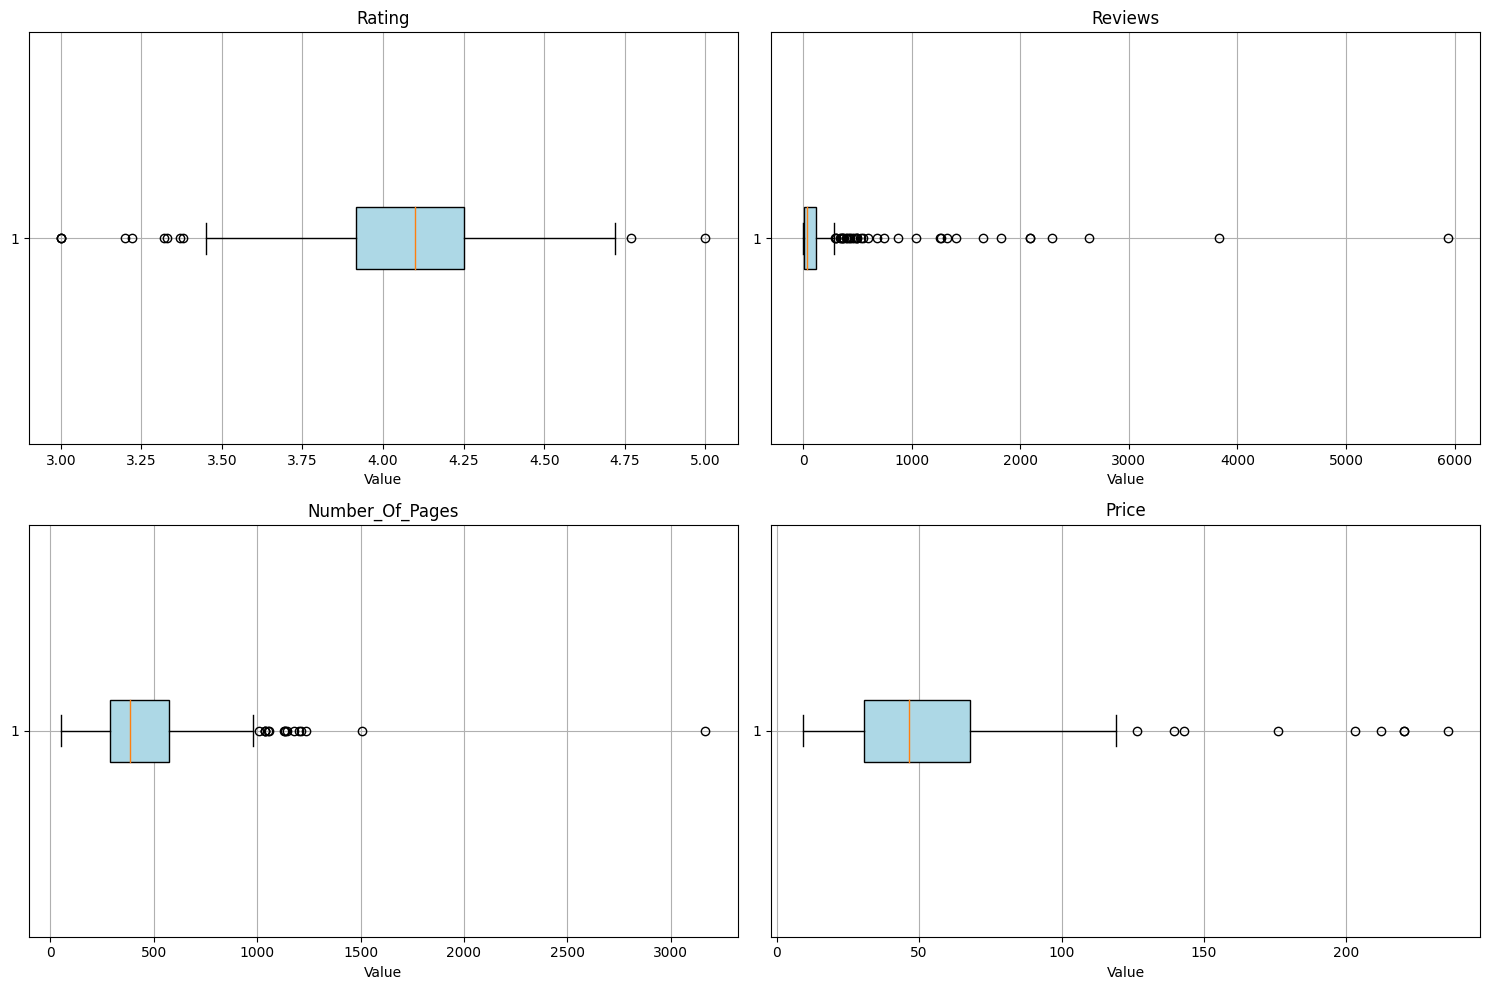

In [41]:
# Task 1: Univariate Outlier detection (4 points)

# Calculate IQR for each numerical feature
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]

# Plot box plots for each numerical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[feature], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f"{feature}")
    plt.xlabel('Value')
    plt.grid(True)

plt.tight_layout()
plt.show()


# TASK 2 Multivariate Outlier detection (6 points)
Let's use the DBSCAN Method for multivariate outlier detection. For this exercise, use the columns [“Price”, “Number_Of_Pages”,“Rating”, “Reviews”, “Type”] to fit DBSCAN.


Your first task is to perform a bivariate analysis on all possible pairs of the above features and identify any outliers. The output should be all the DBSCAN plots and the outlier data row(index&value) for each combination.


Your second task is to look for all combinations of three variables in the above dataset to identify multivariate outliers. The output should again be all the DBSCAN plots(3D) and the outlier data row for all combinations.


Use the following hints for answering this question:
For categorical variables, you can convert them into numerical features for the analysis.

Try scaling the data first.

Tune the eps and min_samples.



In [74]:


# Select relevant columns
selected_columns = ["Price", "Number_Of_Pages", "Rating", "Reviews", "Type"]
df = df[selected_columns]

# Convert categorical variable 'Type' into numerical feature
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])

# print(df['Type'] )

# Scale the data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)




# # Function to perform DBSCAN analysis and plot DBSCAN plots
def perform_dbscan(data, eps, min_samples, title):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(data)

    # Plot DBSCAN plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=data.columns[0], y=data.columns[1], hue=dbscan.labels_, palette='tab10')
    plt.title(title)
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.legend(loc='upper right')
    plt.show()

    outliers = data[dbscan.labels_ == -1]
    # print(f'Outliers for {title}:')

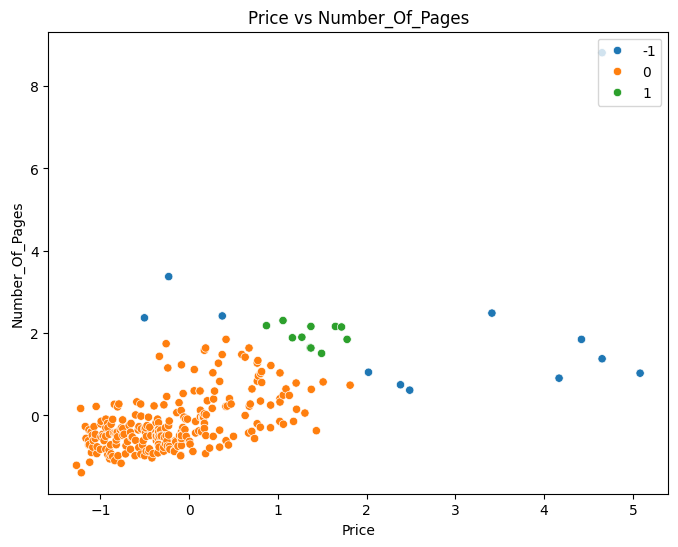

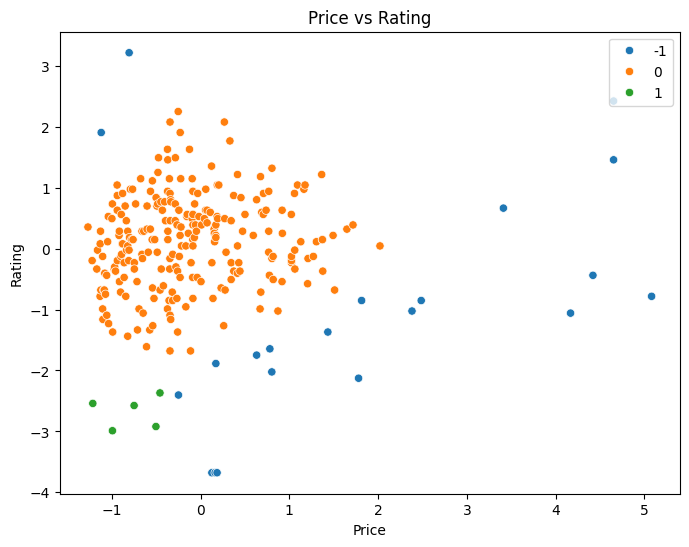

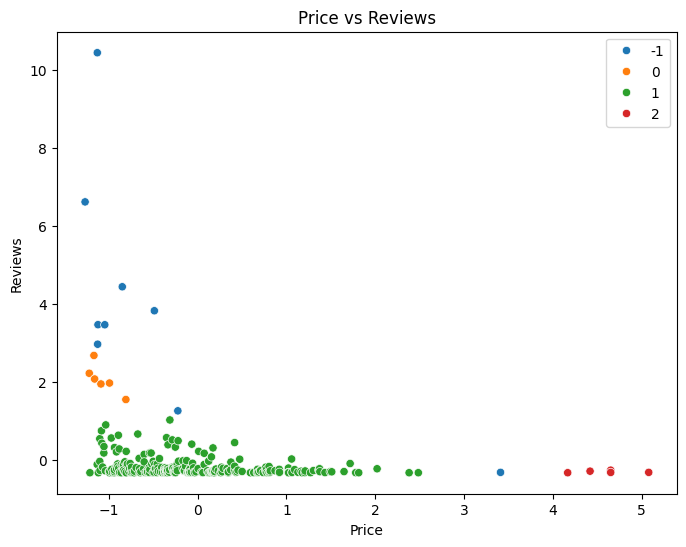

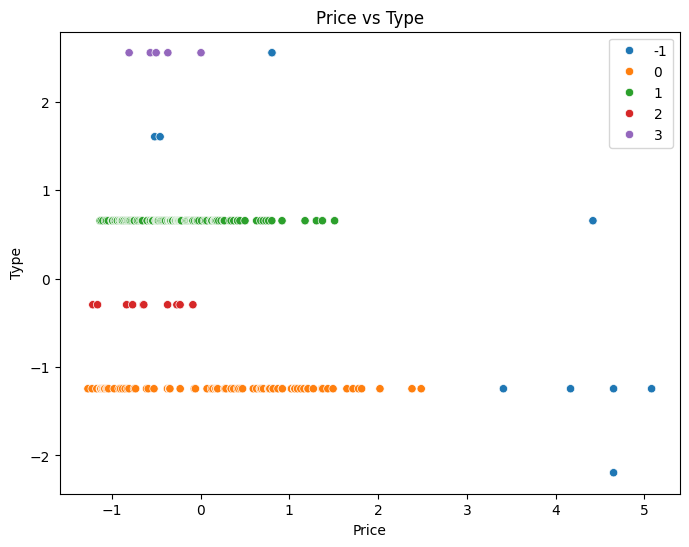

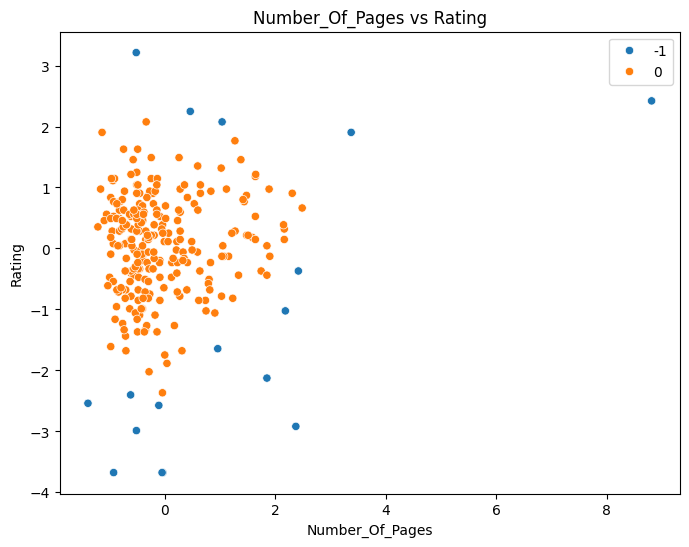

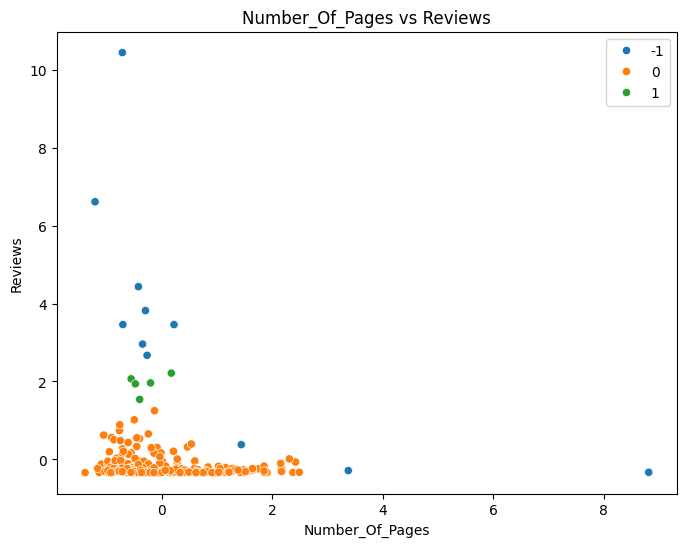

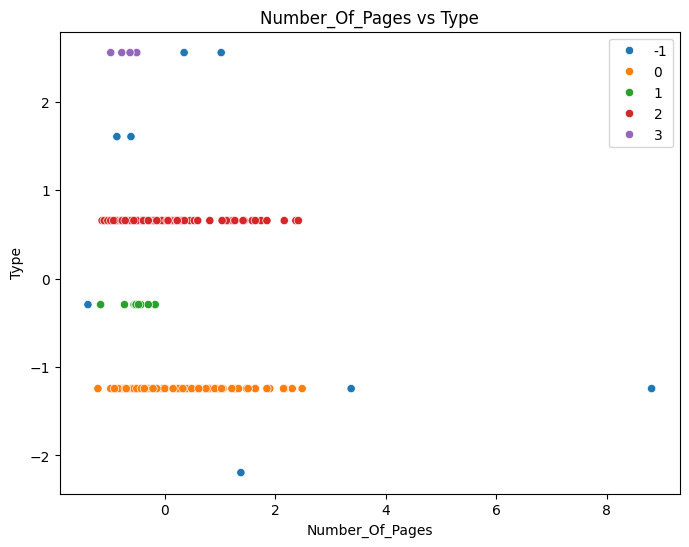

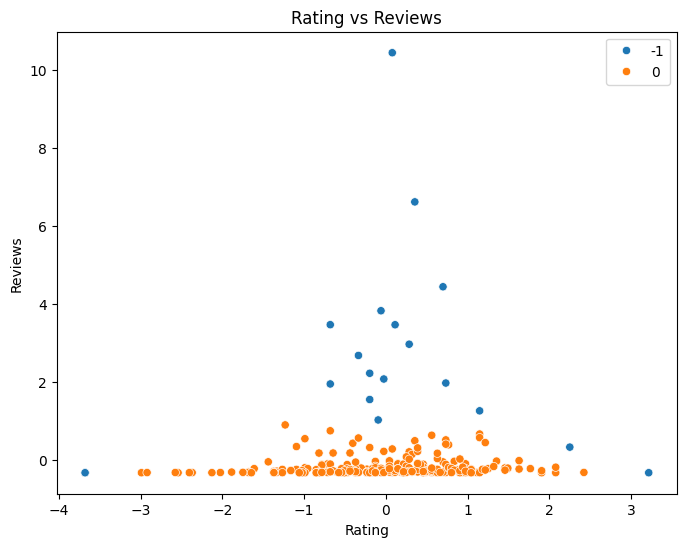

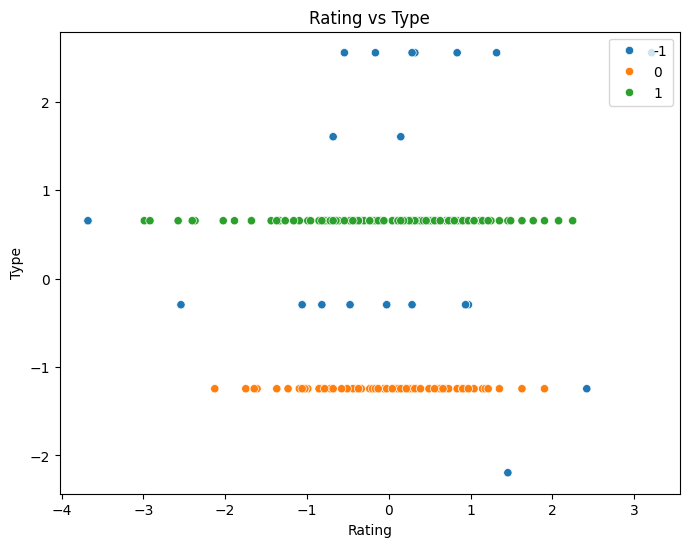

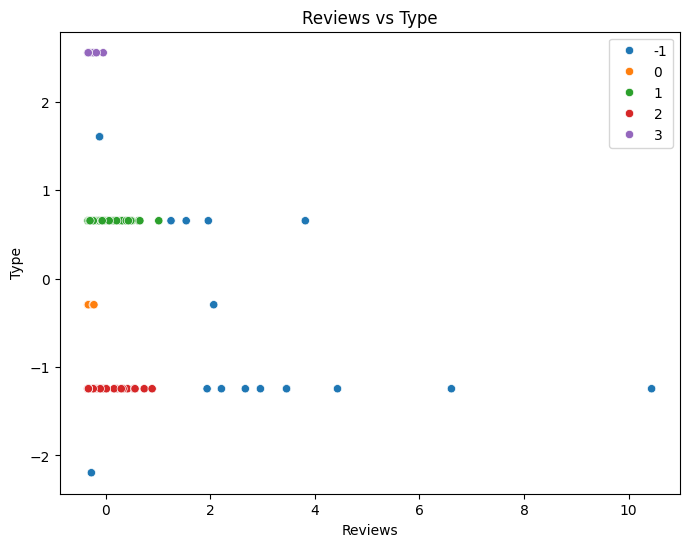

In [76]:
# # Tune the parameters eps and min_samples
# Any data point need at least 5 other data points
# within a distance of 0.5 units to be considered a core point.
eps = 0.5
min_samples = 5

# Task 1: Perform bivariate analysis on all possible pairs of features
combinations_2d = list(combinations(selected_columns, 2))
for combo in combinations_2d:
    features = scaled_df[list(combo)]
    # print(scaled_df[list(('Price', 'Number_Of_Pages'))])
    perform_dbscan(features, eps, min_samples, f'{combo[0]} vs {combo[1]}')



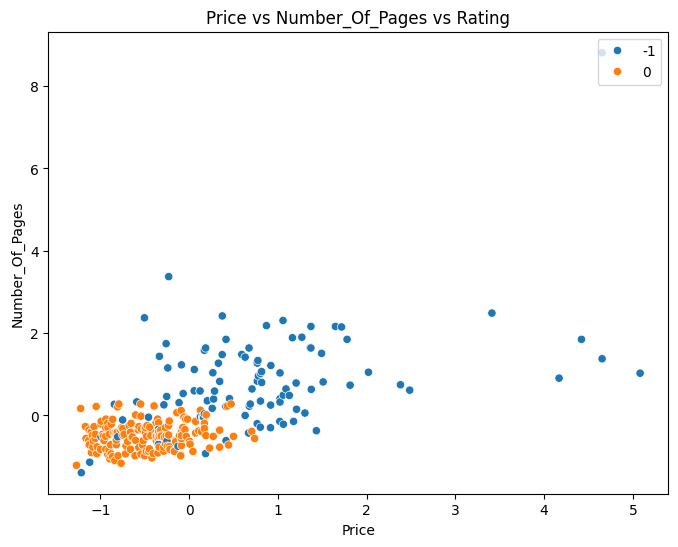

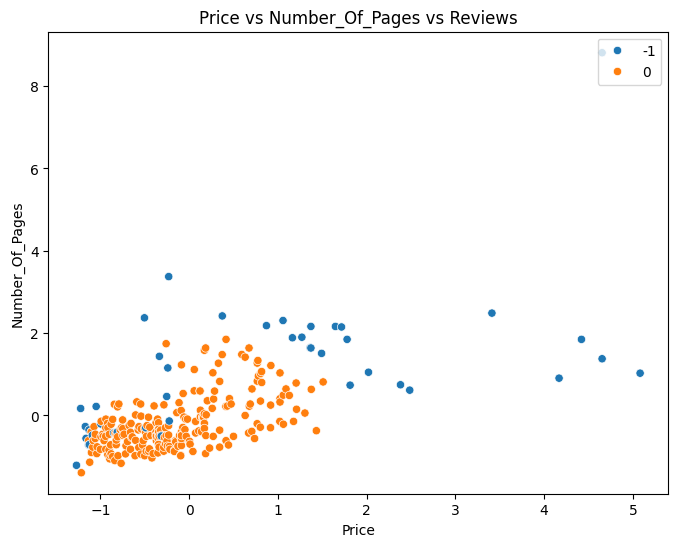

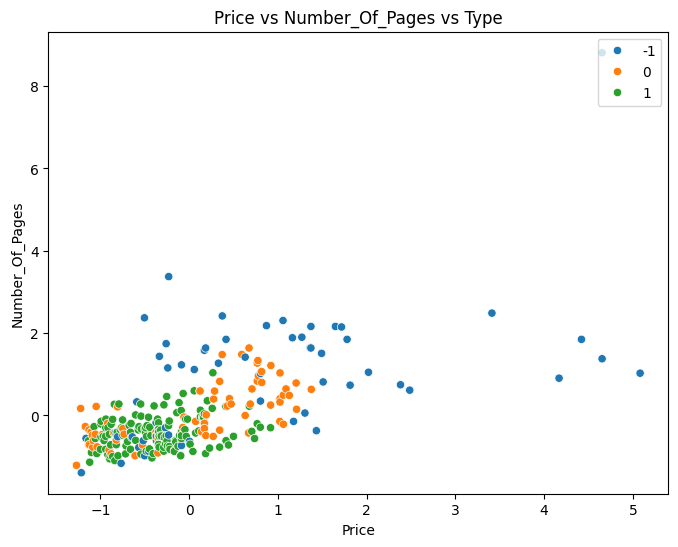

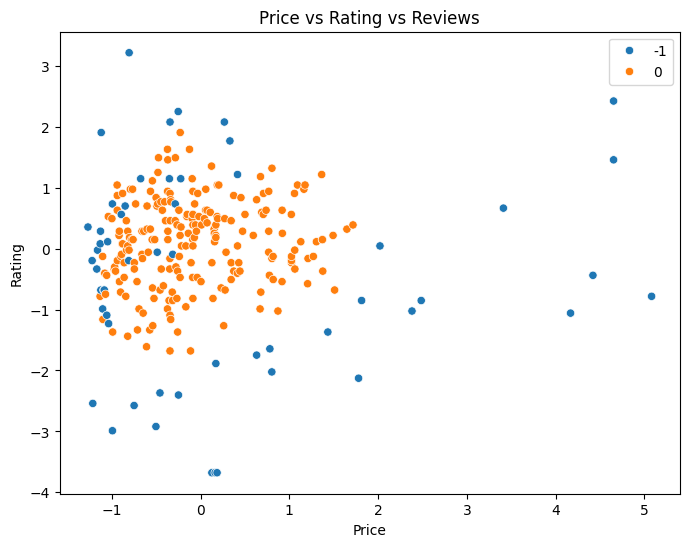

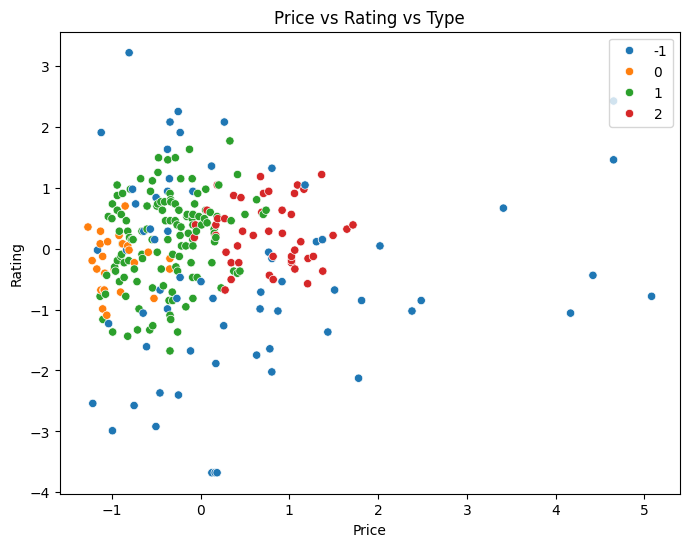

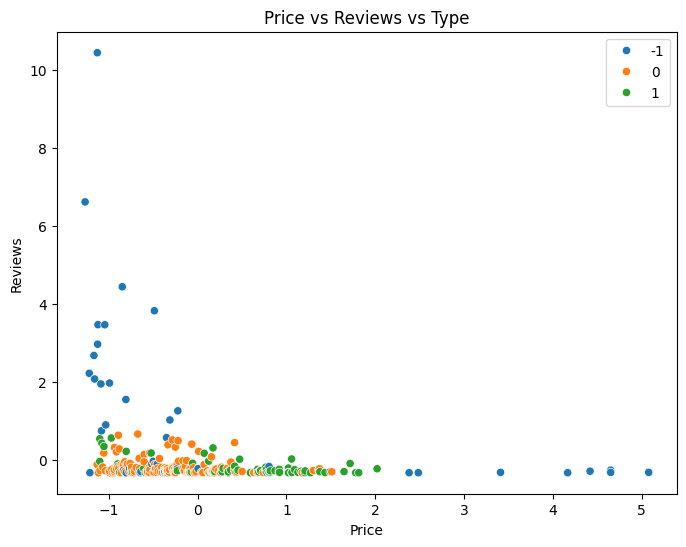

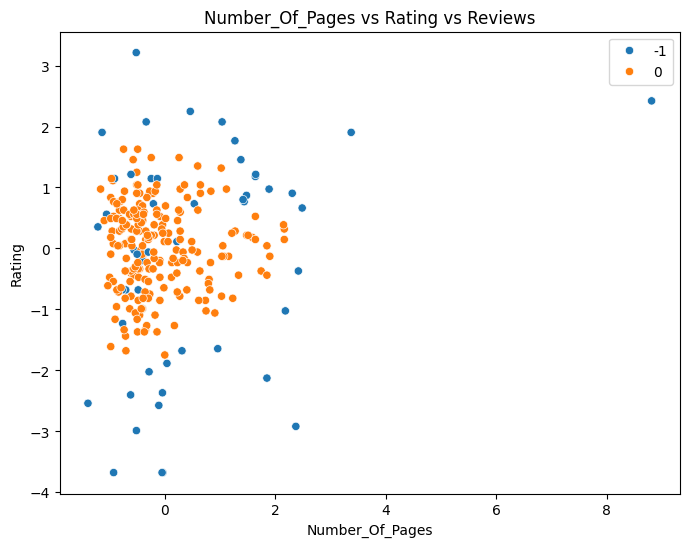

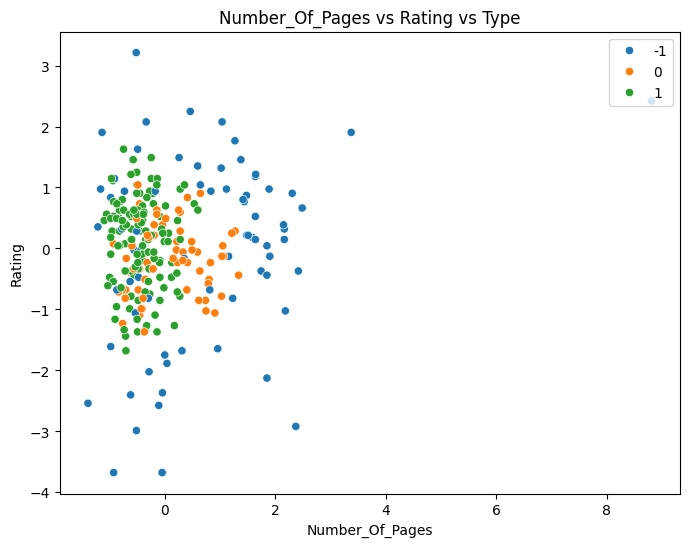

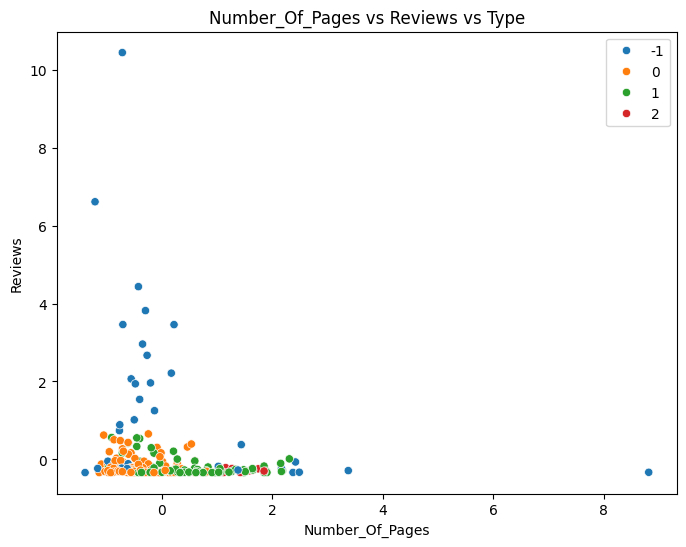

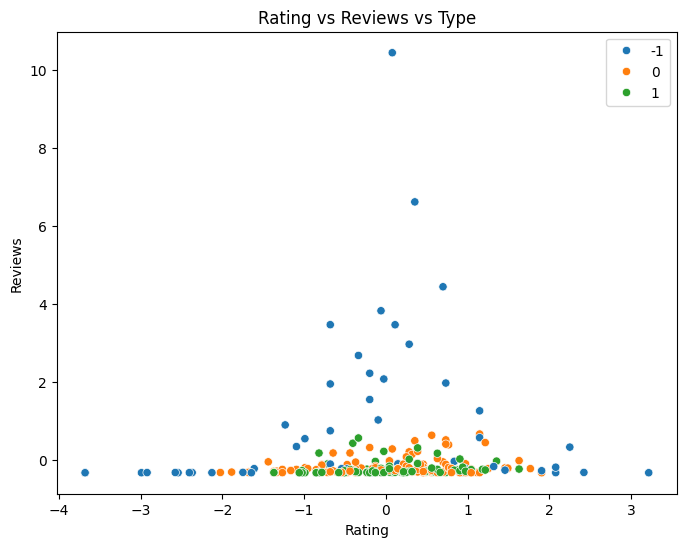

In [82]:
# # Task 2: Perform multivariate analysis by considering all combinations of three variables
eps = 0.5
min_samples = 10

combinations_3d = list(combinations(selected_columns, 3))

for combo in combinations_3d:
    features = scaled_df[list(combo)]
    perform_dbscan(features, eps, min_samples, f'{combo[0]} vs {combo[1]} vs {combo[2]}')
